In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
sns.set_palette("muted")
pd.set_option("display.max_colwidth", 200)


In [2]:
# Load Civil Comments via Hugging Face Datasets.
from datasets import load_dataset

dataset = load_dataset("civil_comments")
df = dataset["train"].to_pandas()
print("Loaded:", df.shape)
df.head()


Loaded: (1804874, 8)


,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
0,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
1,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
2,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
3,Is this something I'll be able to install on my site? When will you be releasing it?,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
4,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.0,0.87234,0.021277,0.0


In [3]:
# Set threshold of 0.5 → toxic = 1, else 0
df["label"] = (df["toxicity"] >= 0.5).astype(int)

# Remove NaNs or empty text
df = df.dropna(subset=["text"]).reset_index(drop=True)

df[["text", "toxicity", "label"]].head(3)


,text,toxicity,label
0,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.0,0
1,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.0,0
2,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.0,0


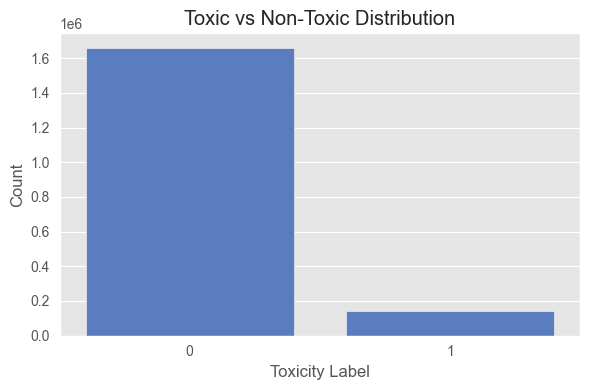

In [4]:
import os
os.makedirs("../outputs/civil_comments", exist_ok=True)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=df)
plt.title("Toxic vs Non-Toxic Distribution")
plt.xlabel("Toxicity Label")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../outputs/civil_comments/toxicity_distribution.png")
plt.show()

In [5]:
# Train/Val/Test split:
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)

print("Train:", train_df.shape, "Val:", val_df.shape, "Test:", test_df.shape)


Train: (1443899, 9) Val: (180487, 9) Test: (180488, 9)


In [6]:
# Save splits to CSV
output_dir = "../outputs/civil_comments"
import os
os.makedirs(output_dir, exist_ok=True)

train_df[["text", "label"]].to_csv(f"{output_dir}/train.csv", index=False)
val_df[["text", "label"]].to_csv(f"{output_dir}/val.csv", index=False)
test_df[["text", "label"]].to_csv(f"{output_dir}/test.csv", index=False)

print("Preprocessed Civil Comments saved.")


✅ Preprocessed Civil Comments saved.


In [7]:
# Basic statistics
avg_len = df["text"].str.len().mean()
max_len = df["text"].str.len().max()
toxicity_ratio = df["label"].mean()

stats = {
    "total_samples": len(df),
    "avg_comment_length": avg_len,
    "max_comment_length": max_len,
    "toxicity_ratio": toxicity_ratio,
    "toxic_samples": df["label"].sum(),
    "non_toxic_samples": (df["label"] == 0).sum()
}
for k, v in stats.items():
    print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")

# Save stats
pd.DataFrame([stats]).to_csv(f"{output_dir}/civil_comments_stats.csv", index=False)


total_samples: 1804874
avg_comment_length: 297.23
max_comment_length: 1906
toxicity_ratio: 0.08
toxic_samples: 144334
non_toxic_samples: 1660540
